In [1]:
import squidpy as sq

In [2]:
import pandas as pd

In [63]:
import scanpy as sc
import scipy
import numpy as np

In [ ]:
# Load the counts matrix (e.g., CSV or TXT file)
counts = pd.read_csv("spatial/MPM08_on_later_counts.csv", index_col=0)

In [22]:
# Create an AnnData object
adata = sc.AnnData(counts.T)

In [23]:
# Load coordinates
coords = pd.read_csv("spatial/MPM08_on_later_coords.csv")

# Add coordinates to AnnData
adata.obs = coords.set_index("cells")
adata.obsm["spatial"] = coords[["x", "y"]].values

In [33]:
adata.uns['spatial'] = {
        "sample": {
            'images': {'hires': None}, 
            'scalefactors': {
                'spot_diameter_fullres': 1.0, 
                'tissue_hires_scalef': 1.0
            }
        }
}

In [38]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)

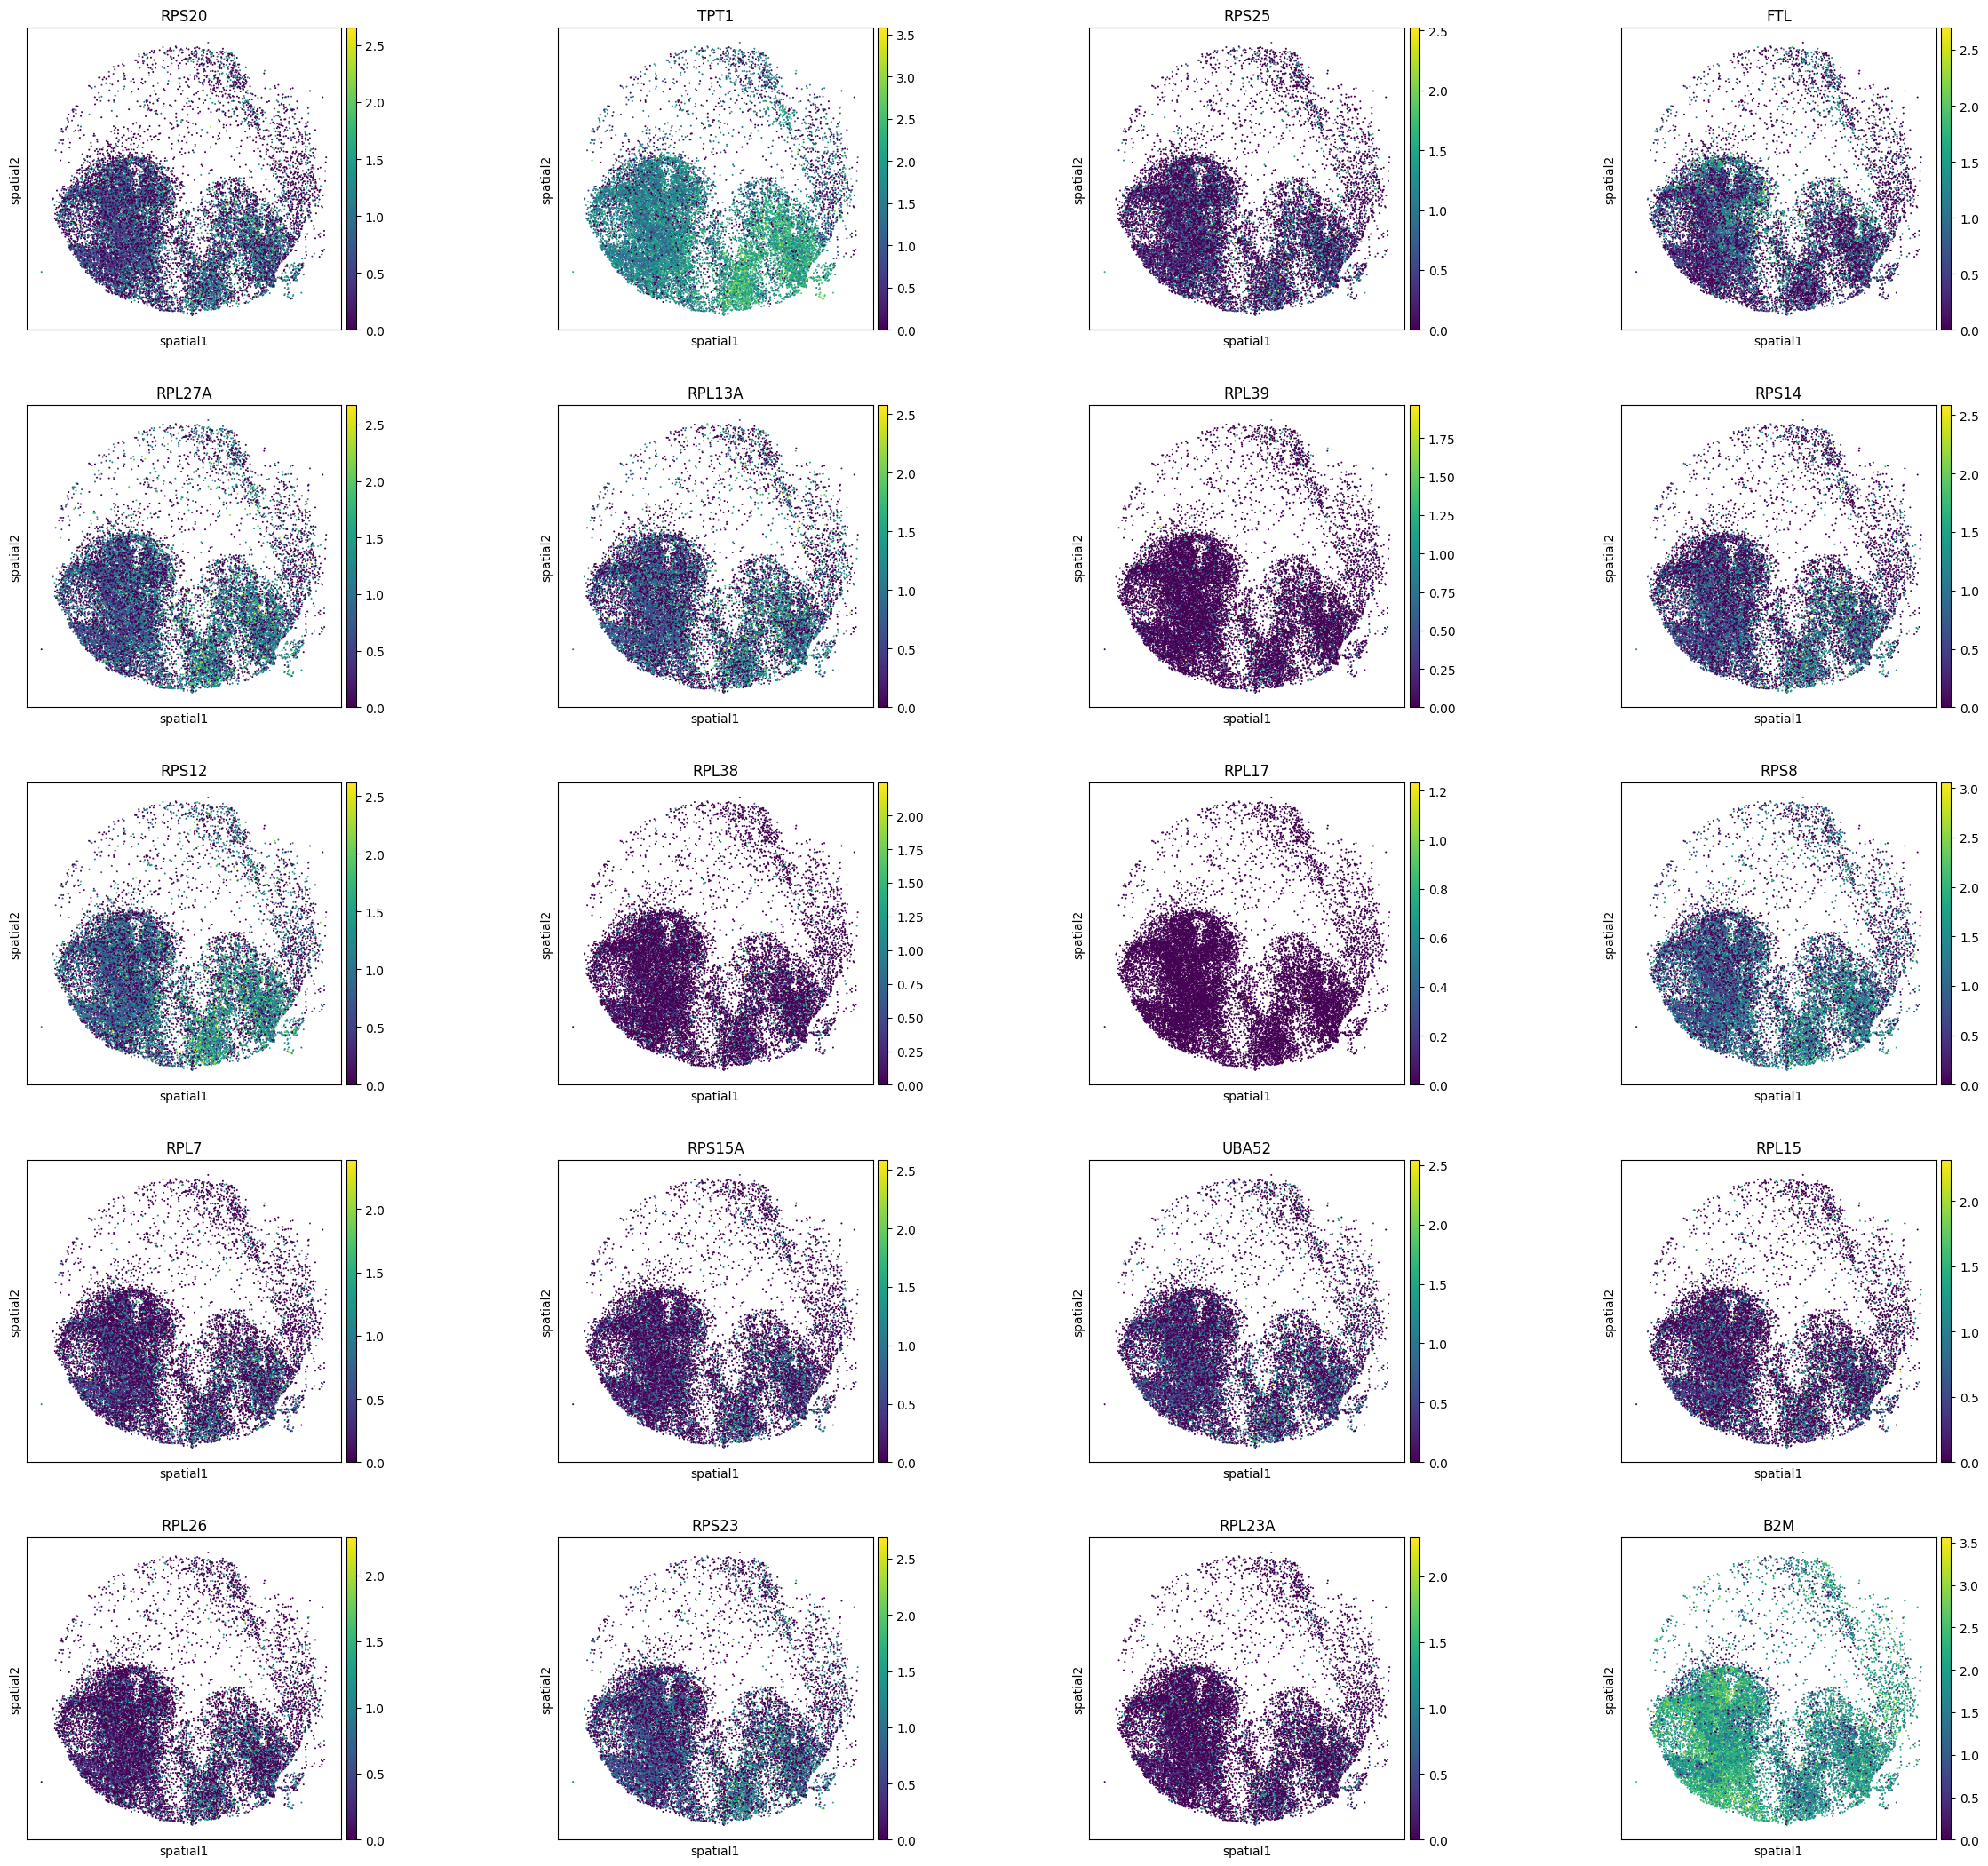

In [57]:
sq.pl.spatial_scatter(adata, color=c4_sig, img = False, size=30)

In [81]:
X = sc.read_h5ad("X.h5")
on2 = X[X.obs['sample'] == "R310_on2"].copy()

sc.pp.highly_variable_genes(on2)

on2 = on2[:,on2.var[on2.var["highly_variable"]==True].index]

sc.tl.rank_genes_groups(on2, groupby="eta_clones", method='wilcoxon')
c4 = sc.get.rank_genes_groups_df(on2, group="C4").sort_values(by="logfoldchanges",ascending=False)

c4 = c4[c4["pvals_adj"]<.05]

/Users/joyfan/miniconda3/envs/decipher-env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


In [82]:
c4 = c4.sort_values(by='logfoldchanges', ascending=False)
c4_sig = list(c4.iloc[0:20]["names"])

In [83]:
adata.obs["C4_sig"] = scipy.stats.zscore(adata[:,c4_sig].to_df().mean(axis=1))

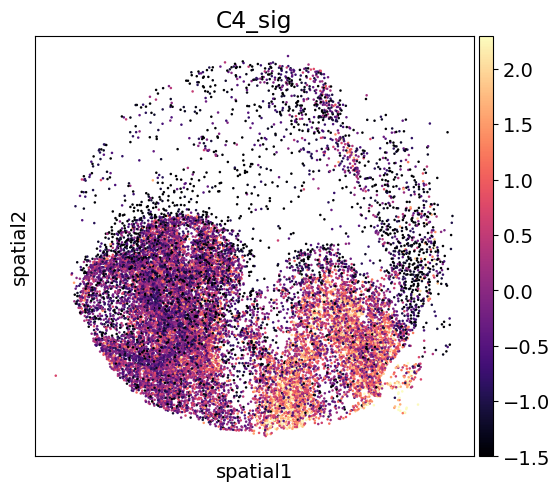

In [77]:
sq.pl.spatial_scatter(adata, color=["C4_sig"], img = False, size=30, cmap='magma', vmax=2.3, vmin=-1.5, save="sig_squid.pdf")

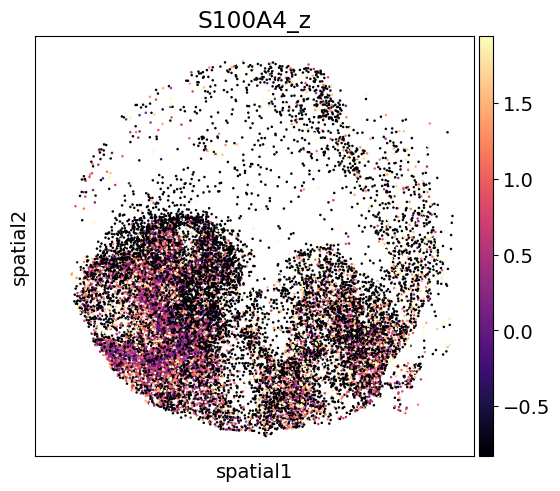

In [78]:
gene = "S100A4"
dat = scipy.stats.zscore(adata.to_df()[gene])
vmax_value = np.percentile(dat, 95)

adata.obs[gene+"_z"] = dat
sq.pl.spatial_scatter(adata, color=[gene+"_z"], img = False, size=30, cmap='magma', vmax=vmax_value, save="s100_squid.pdf")